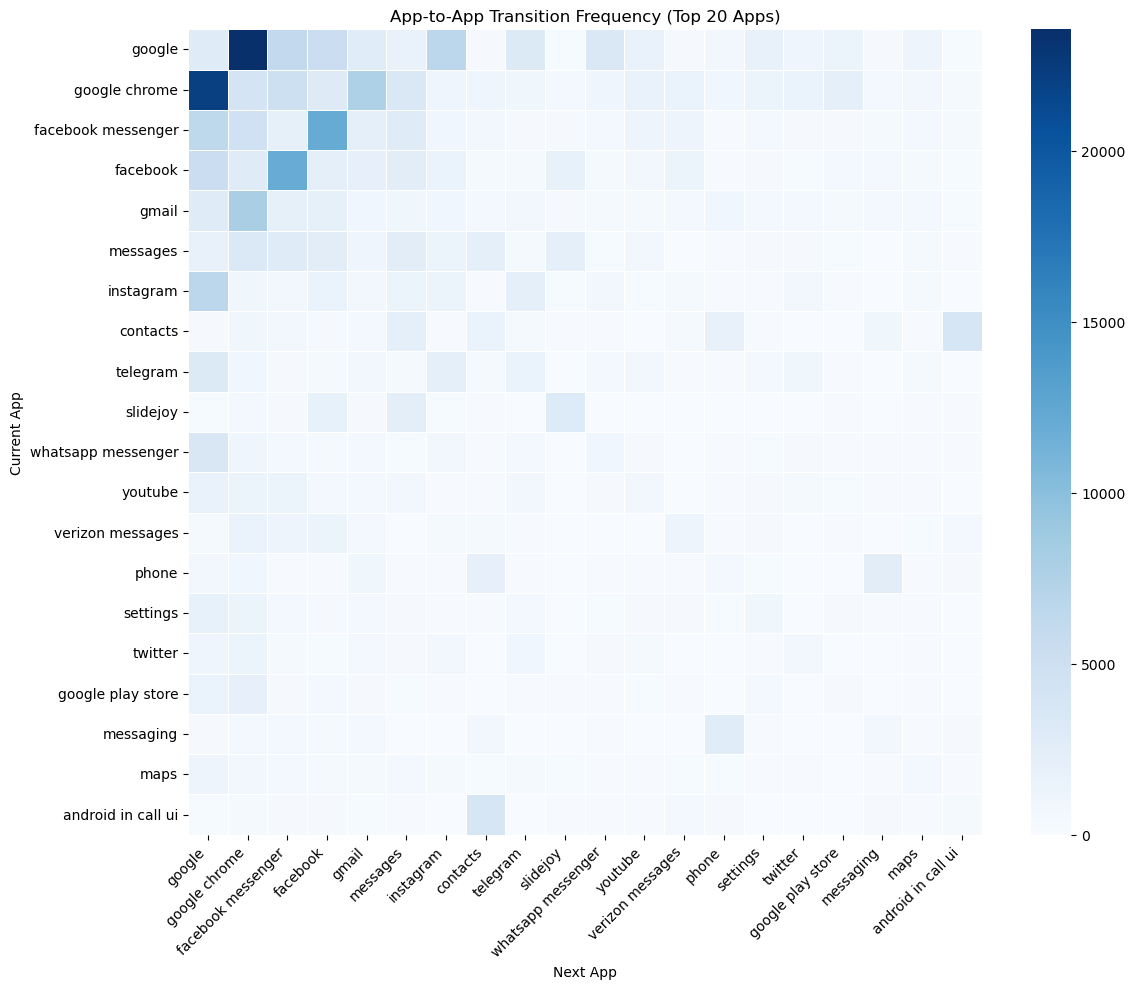

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned CSV file
df = pd.read_csv("lsapp_processed.csv")

# Ensure data is sorted by user and time so sequences make sense
df = df.sort_values(['user_id', 'timestamp'])

# Create 'next_app' column
df['next_app'] = df.groupby('user_id')['app_name'].shift(-1)

# Build the full transition matrix
transitions = df.groupby(['app_name', 'next_app']).size().unstack(fill_value=0)

# Find the total counts of each app (both as current and next app)
app_usage_counts = df['app_name'].value_counts() + df['next_app'].value_counts()
app_usage_counts = app_usage_counts.dropna()  # Drop NaN if any

# Get the top 20 apps based on total counts
top_20_apps = app_usage_counts.sort_values(ascending=False).head(20).index

# Filter the transition matrix to only those top 20 apps for rows and columns
filtered_transitions = transitions.loc[top_20_apps, top_20_apps].fillna(0)

# Plot the heatmap for the filtered top 20 apps
plt.figure(figsize=(12,10))
sns.heatmap(filtered_transitions, cmap='Blues', linewidths=0.5, annot=False)
plt.title("App-to-App Transition Frequency (Top 20 Apps)")
plt.ylabel("Current App")
plt.xlabel("Next App")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
next_app_mode = df.groupby('app_name')['next_app'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print("Most likely next app after each app:")
print(next_app_mode)

Most likely next app after each app:
app_name
amazon shopping                     google
android in call ui                contacts
aol                     facebook messenger
army men strike            army men strike
badoo                   whatsapp messenger
                               ...        
wechat                               faceu
whatsapp messenger                  google
words with friends 2         google chrome
yahoo mail                   google chrome
youtube                             google
Name: next_app, Length: 87, dtype: object


In [34]:
top5 = df['app_name'].value_counts().head(5)
print("Top 5 most used apps:")
print(top5)

Top 5 most used apps:
app_name
google                74824
google chrome         74126
facebook messenger    45231
facebook              44397
gmail                 29547
Name: count, dtype: int64


Unique apps per user:
 count    292.000000
mean      16.113014
std        6.475242
min        1.000000
25%       12.000000
50%       17.000000
75%       20.250000
max       32.000000
Name: app_name, dtype: float64


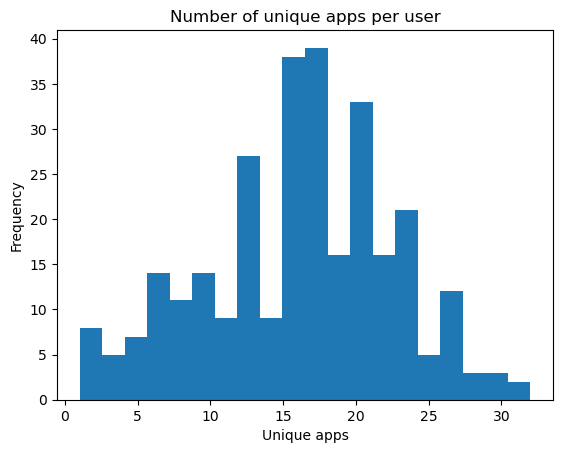

In [35]:
apps_per_user = df.groupby('user_id')['app_name'].nunique()
print("Unique apps per user:\n", apps_per_user.describe())

# Histogram plot
import matplotlib.pyplot as plt
apps_per_user.plot(kind='hist', bins=20, title='Number of unique apps per user')
plt.xlabel('Unique apps')
plt.show()